In [ ]:
pip install sentence_transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd

# Define the paths to your CSV files
csv_paths = ['GeminiTelugu.csv', 'Gpt4Telugu.csv', 'GptTelugu.csv', 'GoogleTranslateTelugu.csv', 'SriSriTelugu.csv']
csv_names = ['GeminiTelugu', 'Gpt4Telugu', 'GptTelugu', 'GoogleTranslateTelugu', 'SriSriTelugu']


dfs = {}

# Read each CSV file and store its DataFrame in the dictionary
for csv_name, csv_path in zip(csv_names, csv_paths):
    df = pd.read_csv(csv_path)
    # Rename columns if needed
    if 'sentence_no' in df.columns and 'text' in df.columns:
        dfs[csv_name] = df[['sentence_no', 'text']]

# Print each DataFrame in the dictionary
for key, df in dfs.items():
    print(f"{key}:")
    print(df)
    print("\n")



GeminiTelugu:
    sentence_no                                               text
0             1  Another world, another world, another world is...
1             2  Stepping forward, singing songs, the heart rev...
2             3  Move forward, offering the blood of our hearts...
3             4  Move forward! Push forward! Let's go, let's go...
4             5  Eighty million Merus are flying, flying, falli...
5             6  Move like snakes, like arrows, like Dhananjaya...
6             7  Another world, another world, another world is...
7             8  Stepping forward, singing songs, the heart rev...
8             9  Move forward, offering the blood of our hearts...
9            10  Move forward! Push forward! Let's go, let's go...
10           11  Soaring, soaring, soaring, eighty million Meru...
11           12  Move like snakes, like arrows, like Dhananjaya...
12           13  I have also offered one sacrificial wood to th...
13           14  Didn't I burn like a sparrow wh

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from str.stringhelper import split

# Create a list to store BLEU scores for each sentence
bleu_scores = {name: [] for name in csv_names if name != 'SriSriTelugu'}  # excluding reference translation

# Iterate through each sentence and compute BLEU score for each translation
for key, df in dfs.items():
    if key == 'SriSriTelugu':
        continue  # Skip computing BLEU score for the reference itself

    for index, row in df.iterrows():
        sentence = row['text']
        reference = [dfs['SriSriTelugu'].loc[index, 'text'].slice()]

      # Compute sentence BLEU score
        score = sentence_bleu([reference.split()], sentence.split(), smoothing_function=SmoothingFunction().method1)
        bleu_scores[key].append(score)

# Print BLEU scores for each sentence
for key, scores in bleu_scores.items():
    print(f'BLEU scores for {key}:')
    for i, score in enumerate(scores, 1):
        print(f'Sentence {i}: {score}')
    print('\n')

In [ ]:


for module_info in pkgutil.iter_modules(['numpy']):
    print(module_info.name)

In [ ]:
# Print the lengths of the references and candidate lists
print(f'Length of references: {len(references)}')
for key, candidate_list in candidates.items():
    print(f'Length of {key} candidates: {len(candidate_list)}')

In [ ]:
sentence_new = []
order = ['SriSriTelugu', 'GeminiTelugu', 'Gpt4Telugu', 'GptTelugu', 'GoogleTranslateTelugu']

for csv_name in order:
    if csv_name in dfs:
        sentence_new.extend(dfs[csv_name]['text'].tolist())

# Print the combined list of sentences
print(sentence_new)



["Another world, another world, another world has called! March forward, march onward! Let's go, let's go upward!", "Stepping rhythmically, singing verses, heart thundering - march on, let's go, don't you hear the waterfalls of another world?", "Quenching the heart's thirst along the way, march forward! Traversing paths, crossing villages, overcome all forts! What are the rivers, forests, mountains to our determination?", "March forward! March onward! Let's go, let's go upward! You elders with bent bones and aged bodies! Die! You soldiers with burning courage and power galore! Come! Harom! Harom Har! Har! Har! Har! Har! Harom Hara! Move forth! Another world, the supreme world is filled all over the earth! March forward, march onward! Rise up like a storm! Spread with the speed of thoughts! Roar like the thunderous clouds of the deluge! Fall pell-mell! March, march, march forward! Don't you see the blazing flames of another world?", 'Erupting, erupting, erupting rise sixty million volca

In [ ]:
sentence_embeddings = model.encode(sentence_new)
print(sentence_embeddings)

[[ 0.03339104  0.10476378  0.02318109 ...  0.00322524 -0.02096647
  -0.02027571]
 [-0.01397437  0.01715685  0.01750739 ... -0.03636276 -0.05188215
  -0.01317913]
 [ 0.04006594  0.03406393 -0.01142045 ...  0.01840987 -0.01721438
  -0.03871126]
 ...
 [ 0.00074529  0.06546674 -0.02066579 ...  0.01830916  0.00016181
  -0.00615992]
 [ 0.01325579 -0.00747407 -0.00669155 ...  0.03003361 -0.01502024
  -0.00230991]
 [ 0.01865783  0.05326083 -0.01368036 ...  0.03488431  0.00582856
  -0.02263835]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


i = 0
j = 59
k = 119
l = 179
m = 239
sentence_no = 1
data = []


for i in range(0,59):

  gemini_SriSri = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[i]])[0][0]
  gpt4_SriSri = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]
  gpt_SriSri = cosine_similarity([sentence_embeddings[l]], [sentence_embeddings[i]])[0][0]
  SriSri_google = cosine_similarity([sentence_embeddings[m]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Sentence_no': sentence_no ,
           'OfficialTranslation(SriSri)':sentence_new[i],
           "Gemini" : sentence_new[j],
           "GPT 4" :sentence_new[k],
           "Chat-GPT":sentence_new[l],
           "Google Translate":sentence_new[m],
         'Gemini - SriSri': gemini_SriSri,
         'Gpt4Telugu - SriSri': gpt4_SriSri,
         'GptTelugu - SriSri': gpt_SriSri,
         'Google- SriSri ': SriSri_google}
  data.append(dict1)
  i+=1
  j+=1
  k+=1
  l+=1
  m+=1
  sentence_no+=1

df_new = pd.DataFrame(data)
print(df_new)
df_new.to_csv('SentimentTelugu.csv', index=False)


    Sentence_no                        OfficialTranslation(SriSri)  \
0             1  Another world, another world, another world ha...   
1             2  Stepping rhythmically, singing verses, heart t...   
2             3  Quenching the heart's thirst along the way, ma...   
3             4  March forward! March onward! Let's go, let's g...   
4             5  Erupting, erupting, erupting rise sixty millio...   
5             6  Advance like arrows, advance like meteors, lik...   
6             7  Another world, another world, another world ha...   
7             8  Stepping rhythmically, singing verses, heart t...   
8             9  Quenching the heart's thirst along the way, ma...   
9            10  March forward! March onward! Let's go, let's g...   
10           11  Erupting, erupting, erupting rise sixty millio...   
11           12  Advance like arrows, advance like meteors, lik...   
12           13  I too have offered a piece of firewood to the ...   
13           14  Did

In [ ]:
import numpy as np
from tqdm import tqdm
from typing import List, Union, Tuple
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
!pip install keybert==0.7.0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cache

In [ ]:
from keybert import KeyBERT
# KeyBERT
from keybert._mmr import mmr
from keybert._maxsum import max_sum_distance
from keybert._highlight import highlight_document
from keybert.backend._utils import select_backend

In [ ]:
model = KeyBERT(model = 'all-mpnet-base-v2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
model


In [ ]:
import pandas as pd
df = pd.read_csv('SentimentSanskrit.csv')


In [ ]:
import pandas as pd


columns_to_extract = ['OfficialTranslation', 'Gemini', 'GPT 4', 'Chat-GPT', 'Google Translate']

# Initialize an empty DataFrame to store the keywords
final_df = pd.DataFrame()

# Loop through each column and extract keywords
for column in columns_to_extract:
    # Combine all text from the current column into a single string
    combined_text = ' '.join(df[column])

    # Extract keywords from the combined text
    keywords = model.extract_keywords(combined_text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=20, use_mmr=True, diversity=0.5)

    # Convert the list of tuples to a DataFrame
    keyword_df = pd.DataFrame(keywords, columns=['Keyword', 'Score'])

    # Add a column to the DataFrame to indicate the source column
    keyword_df['Source'] = column

    # Append the keywords to the final DataFrame
    final_df = pd.concat([final_df, keyword_df], ignore_index=True)

# Display the top keywords from each column
print(final_df)

     Keyword   Score                       Source
0     onward  0.4172  OfficialTranslation(SriSri)
1      harom  0.3396  OfficialTranslation(SriSri)
2       roar  0.3293  OfficialTranslation(SriSri)
3   erupting  0.3278  OfficialTranslation(SriSri)
4      world  0.3181  OfficialTranslation(SriSri)
..       ...     ...                          ...
95     boast  0.1371             Google Translate
96  wayfarer  0.1155             Google Translate
97      just  0.0962             Google Translate
98     lakhs  0.0518             Google Translate
99      does  0.0383             Google Translate

[100 rows x 3 columns]


In [ ]:
import pandas as pd

columns_to_extract = ['OfficialTranslation', 'Gemini', 'GPT 4', 'Chat-GPT', 'Google Translate']

# Initialize an empty DataFrame to store the keywords
final_df = pd.DataFrame()

# Loop through each column and extract keywords
for column in columns_to_extract:
    # Combine all text from the current column into a single string
    combined_text = ' '.join(df[column])

    # Extract keywords from the combined text
    keywords = model.extract_keywords(combined_text, keyphrase_ngram_range=(2, 2), stop_words='english', top_n=20, use_mmr=True, diversity=0.5)

    processed_keywords = [(f"{{{keyword[0]}}}" if ',' in keyword[0] else keyword[0], keyword[1]) for keyword in keywords]

    # Convert the list of tuples to a DataFrame
    keyword_df = pd.DataFrame(processed_keywords, columns=['Keyword', 'Score'])

    # Rename the 'Score' column to include the original column name followed by '_score'
    score_column_name = f"{column}_Keywords"
    keyword_df.rename(columns={'Keyword': score_column_name}, inplace=True)

    # Append the keywords to the final DataFrame
    final_df = pd.concat([final_df, keyword_df], axis=1)

# Display the top keywords from each column
print(final_df)
final_df.to_csv('BigramsSanskrit.csv', index=False)


   OfficialTranslation_Keywords   Score       Gemini_Keywords   Score  \
0                 battle arjuna  0.5871    kurukshetra armies  0.5967   
1                 army pandavas  0.5210    dhartarashtra army  0.5741   
2         soldier dhrishtayumna  0.4713        pandava arjuna  0.5702   
3            commanded bheeshma  0.4259      chariot warriors  0.5159   
4                betwixt armies  0.4101        battle govinda  0.4914   
5         respectively maharaja  0.3912    kill dhritarashtra  0.4881   
6             prince duryodhana  0.3774     king yudhishthira  0.4704   
7            kurukshetra people  0.3722     warrior shikhandi  0.4573   
8                    kunti blew  0.3216  formation duryodhana  0.4308   
9                 asked sanjaya  0.3129        saubhadra sons  0.3932   
10                  drona spoke  0.2971       kill countrymen  0.3819   
11               trumpets horns  0.2635          castes leads  0.3674   
12                 bore hanuman  0.2495  dharma rig

In [ ]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

# Initialize stop words
stop_words = stopwords.words('english')

def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

def tokenize(tweet):
    return simple_preprocess(str(tweet))

def preprocessing(df):
    df['Tweet'] = df['Tweet'].str.lower() # Convert to lowercase
    df['Tweet'] = df['Tweet'].str.replace("[^a-zA-Z#]", " ") # Remove punctuations
    df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3])) # Remove short words
    df['Tweet tokens'] = df['Tweet'].apply(tokenize)
    df['tokens_no_stop'] = df['Tweet tokens'].apply(remove_stopwords)
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(text, n):
    wordList = re.sub("[^\w]", " ", text).split()
    ngrams_series = pd.Series(ngrams(wordList, n)).value_counts()[:10]
    return ngrams_series

columns_to_extract = ['OfficialTranslation', 'Gemini', 'GPT 4', 'Chat-GPT', 'Google Translate']

# Initialize an empty DataFrame to store the bigrams
final_df = pd.DataFrame()

# Loop through each column and extract bigrams
for column in columns_to_extract:
    # Combine all text from the current column into a single string
    combined_text = ' '.join(df[column])

    # Preprocess the text
    df_temp = pd.DataFrame({'Tweet': [combined_text]})
    df_temp = preprocessing(df_temp)

    # Retrieve text without stopwords
    doc = retrieve_text(df_temp)

    # Generate n-grams
    ngrams_series = ngrams_series_func(doc, 2)

    # Convert the Series to a DataFrame
    bigram_df = pd.DataFrame(ngrams_series.items(), columns=['Bigram', 'Frequency'])

    # Rename the 'Frequency' column to include the original column name followed by '_frequency'
    frequency_column_name = f"{column}_Bigrams"
    bigram_df.rename(columns={'Bigram': frequency_column_name}, inplace=True)

    # Append the bigrams to the final DataFrame
    final_df = pd.concat([final_df, bigram_df], axis=1)

# Display the top bigrams from each column
print(final_df)
final_df.to_csv('BigramsFrequencySanskrit.csv', index=False)


  OfficialTranslation_Bigrams  Frequency         Gemini_Bigrams  Frequency  \
0       (sons, dhritarashtra)          5   (family, traditions)          3   
1             (shri, krishna)          4  (destruction, family)          3   
2                (lord, shri)          4       (great, chariot)          3   
3             (king, drupada)          2         (spoke, these)          2   
4                (come, from)          2         (eager, fight)          2   
5         (pandavas, paraded)          2      (chariot, middle)          2   
6           (great, soldiers)          2        (sanjaya, said)          2   
7         (though, commanded)          2           (even, life)          2   
8                   (in, law)          2         (even, though)          2   
9               (army, seems)          2         (their, lives)          2   

           GPT 4_Bigrams  Frequency      Chat-GPT_Bigrams  Frequency  \
0         (conch, shell)          7        (their, lives)          5 

TypeError: 'value' must be an instance of str or bytes, not a tuple

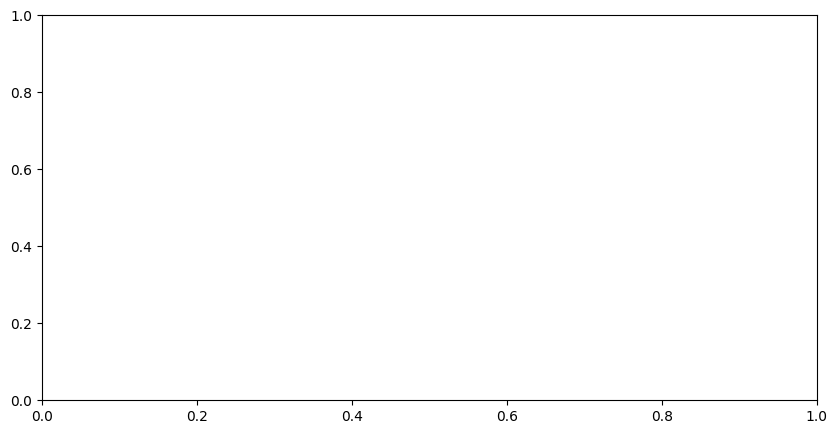

In [ ]:
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame containing the bigrams frequency count
# For demonstration, let's plot the frequency of the top 10 bigrams from the first column
column_to_plot = columns_to_extract[0] # Change this to the column you want to plot
bigram_column_name = f"{column_to_plot}_Bigrams"

# Extract the top 10 bigrams and their frequencies
top_bigrams = final_df[bigram_column_name].value_counts().head(10)

# Plot the bigrams
plt.figure(figsize=(10, 5))
plt.bar(top_bigrams.index, top_bigrams.values)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title(f'Top 10 Bigrams in {column_to_plot}')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


In [ ]:
final_df.to_csv('KeywordsTelugu.csv', index=False)

In [ ]:

combined_text = ' '.join(df['text'])

# Extract keywords from the combined text
keywords = model.extract_keywords(combined_text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=20, use_mmr=True, diversity=0.5)

# Convert the list of tuples to a DataFrame
keyword_df = pd.DataFrame(keywords, columns=['Keyword', 'Score'])

combined_scores = {}
for index, row in keyword_df.iterrows():
    keyword = row['Keyword']
    score = row['Score']
    if keyword in combined_scores:
        combined_scores[keyword] += score
    else:
        combined_scores[keyword] = score

# Convert the combined scores dictionary to a DataFrame
combined_scores_df = pd.DataFrame(list(combined_scores.items()), columns=['Keyword', 'Combined Score'])

# Display the top keywords with combined scores
print(combined_scores_df)

KeyError: 'text'

In [ ]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

# Initialize stop words
stop_words = stopwords.words('english')


def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

def tokenize(tweet):
    return simple_preprocess(str(tweet))

def preprocessing(df):
    df['Tweet'] = df['Tweet'].str.lower() # Convert to lowercase
    df['Tweet'] = df['Tweet'].str.replace("[^a-zA-Z#]", " ") # Remove punctuations
    df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3])) # Remove short words
    df['Tweet tokens'] = df['Tweet'].apply(tokenize)
    df['tokens_no_stop'] = df['Tweet tokens'].apply(remove_stopwords)
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(text, n):
    wordList = re.sub("[^\w]", " ", text).split()
    ngrams_series = pd.Series(ngrams(wordList, n)).value_counts()[:10]
    return ngrams_series

# Rename the 'text' column to 'Tweet' to match the preprocessing function
df.rename(columns={'text': 'Tweet'}, inplace=True)

# Apply preprocessing
df = preprocessing(df)

# Retrieve text
doc = retrieve_text(df)

# Generate n-grams
ngrams_series = ngrams_series_func(doc, 3)

print("Processed Text:", doc)
print("Top 10 2-grams:", ngrams_series)


KeyError: 'Tweet'